✅ Setup Selesai. Semua library siap digunakan.

--- Langkah 1: Memuat Data ---
Silakan unggah file `20191002-reviews.csv` Anda.


Saving 20191002-reviews.csv to 20191002-reviews (5).csv

✅ File '20191002-reviews (5).csv' berhasil dimuat.
Contoh data awal:


,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02



--- Langkah 2: Pra-pemrosesan dan Persiapan Data ---

           Deskripsi Hasil Proses Pra-pemrosesan Data
Pra-pemrosesan adalah tahap krusial untuk menyiapkan data mentah
agar dapat diolah dengan baik oleh model IndoBERT. Berikut adalah
langkah-langkah yang dilakukan pada dataset ini:

1.  Pembersihan Data & Filtering:
    ----------------------------
    a. Seleksi Fitur: Hanya kolom 'rating' dan 'reviewContent' yang digunakan.
    b. Penanganan Nilai Hilang (Missing Values):
       - Ulasan (review) yang berisi teks 'null' diubah menjadi nilai kosong.
       - Baris data dengan ulasan atau rating yang kosong kemudian dihapus.
    c. Filtering Rating Netral: Ulasan dengan rating 3 (netral) dihapus
       untuk menciptakan masalah klasifikasi biner yang lebih jelas antara
       sentimen 'Positif' dan 'Negatif'.

2.  Pembuatan Fitur (Feature Engineering):
    -------------------------------------
    - Sebuah kolom baru bernama 'label' dibuat dari kolom 'rating'.
    - Aturan: Ratin

/tmp/ipython-input-5-4257786079.py:99: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review'].replace('null', np.nan, inplace=True)
/tmp/ipython-input-5-4257786079.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['rating'] = pd.to_numeric(df_selected['rating'], error

,text,label
0,bagus mantap dah sesui pesanan,1
1,"Bagus, sesuai foto",1
2,okkkkk mantaaaaaaapppp ... goood,1
3,bagus sesuai,1
4,bima,0



--- Langkah 3: Tokenisasi Data untuk BERT ---
Pada tahap ini, teks ulasan akan diubah menjadi format angka (token) yang dapat dipahami oleh model IndoBERT.

Data dibagi menjadi:
- Data Latih: 82125 sampel
- Data Uji:   20532 sampel


Map:   0%|          | 0/82125 [00:00<?, ? examples/s]

Map:   0%|          | 0/20532 [00:00<?, ? examples/s]


✅ Tokenisasi selesai. Data siap untuk proses fine-tuning.

--- Langkah 4: Memulai Fine-Tuning Model IndoBERT ---
Proses ini akan memakan waktu beberapa menit, bahkan dengan GPU...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-5-4257786079.py:187: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
100,0.213100
200,0.151400
300,0.169500
400,0.169300
500,0.190600
600,0.180800
700,0.159700
800,0.153500
900,0.160600
1000,0.139600



✅ Fine-tuning selesai!

--- Langkah 5: Evaluasi Model pada Data Uji ---



Laporan Klasifikasi Akhir:
              precision    recall  f1-score   support

     Negatif     0.8351    0.8369    0.8360      1827
     Positif     0.9841    0.9839    0.9840     18705

    accuracy                         0.9708     20532
   macro avg     0.9096    0.9104    0.9100     20532
weighted avg     0.9708    0.9708    0.9708     20532



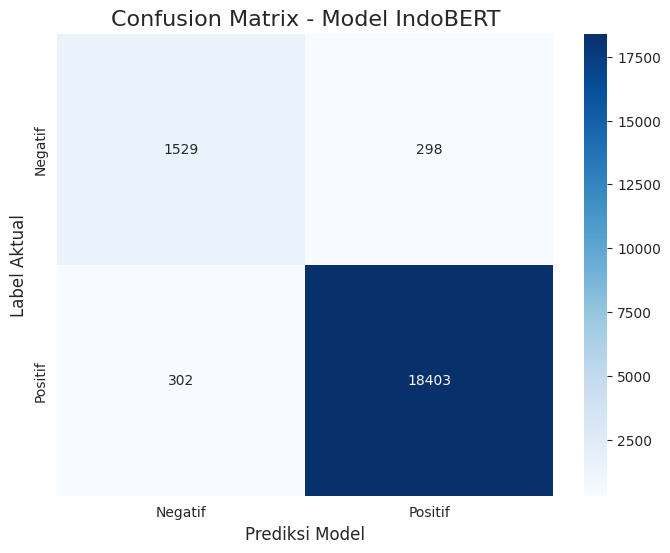

In [5]:
# @title Kode Lengkap: Klasifikasi Sentimen Ulasan dengan IndoBERT
# =================================================================
# Salin dan jalankan seluruh kode ini di satu sel Google Colab.
# PASTIKAN ANDA SUDAH MENGAKTIFKAN GPU DI RUNTIME COLAB (Runtime -> Change runtime type -> T4 GPU).
# =================================================================

# -------------------------------------------------------------------
# Langkah 0: Instalasi dan Impor Library
# -------------------------------------------------------------------
# Instalasi library transformers dari Hugging Face dan library tambahan
!pip install transformers[torch] datasets evaluate -q

# Impor library yang dibutuhkan
import pandas as pd
import numpy as np
import re
import torch
import evaluate
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import Dataset, Features, ClassLabel, Value
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
from sklearn.metrics import classification_report, confusion_matrix

# Mengatur style visualisasi
%matplotlib inline
sns.set_style('whitegrid')

print("✅ Setup Selesai. Semua library siap digunakan.")


# -------------------------------------------------------------------
# Langkah 1: Mengunggah dan Memuat Dataset
# -------------------------------------------------------------------
print("\n--- Langkah 1: Memuat Data ---")
print("Silakan unggah file `20191002-reviews.csv` Anda.")
uploaded = files.upload()

try:
    file_name = next(iter(uploaded))
    df = pd.read_csv(file_name)
    print(f"\n✅ File '{file_name}' berhasil dimuat.")
    print("Contoh data awal:")
    display(df.head())
except Exception as e:
    print(f"\n❌ Terjadi error saat memuat file: {e}")
    df = None


# -------------------------------------------------------------------
# Langkah 2: Pra-pemrosesan dan Persiapan Data
# -------------------------------------------------------------------
if df is not None:
    print("\n--- Langkah 2: Pra-pemrosesan dan Persiapan Data ---")

    # =================================================================================
    # >>>>>>>> DESKRIPSI PROSES PREPROCESSING <<<<<<<<
    # =================================================================================
    print("\n============================================================")
    print("           Deskripsi Hasil Proses Pra-pemrosesan Data")
    print("============================================================")
    print("Pra-pemrosesan adalah tahap krusial untuk menyiapkan data mentah")
    print("agar dapat diolah dengan baik oleh model IndoBERT. Berikut adalah")
    print("langkah-langkah yang dilakukan pada dataset ini:\n")

    print("1.  Pembersihan Data & Filtering:")
    print("    ----------------------------")
    print("    a. Seleksi Fitur: Hanya kolom 'rating' dan 'reviewContent' yang digunakan.")
    print("    b. Penanganan Nilai Hilang (Missing Values):")
    print("       - Ulasan (review) yang berisi teks 'null' diubah menjadi nilai kosong.")
    print("       - Baris data dengan ulasan atau rating yang kosong kemudian dihapus.")
    print("    c. Filtering Rating Netral: Ulasan dengan rating 3 (netral) dihapus")
    print("       untuk menciptakan masalah klasifikasi biner yang lebih jelas antara")
    print("       sentimen 'Positif' dan 'Negatif'.\n")

    print("2.  Pembuatan Fitur (Feature Engineering):")
    print("    -------------------------------------")
    print("    - Sebuah kolom baru bernama 'label' dibuat dari kolom 'rating'.")
    print("    - Aturan: Rating 4 atau 5 diberi label numerik 1 (Positif),")
    print("      sedangkan rating 1 atau 2 diberi label numerik 0 (Negatif).")
    print("    - Label numerik ini adalah 'Ground Truth' yang akan digunakan model.\n")

    print("3.  Penyesuaian untuk Model BERT:")
    print("    ---------------------------------")
    print("    - Kolom 'reviewContent' diubah namanya menjadi 'text' agar sesuai")
    print("      dengan format yang umum digunakan pada library Hugging Face.")
    print("    - Tidak seperti metode leksikon, pembersihan teks manual (case folding,")
    print("      hapus tanda baca) tidak dilakukan karena model BERT sudah dilatih")
    print("      pada data mentah dan mampu memahami konteks dari teks asli.\n")

    print("============================================================\n")
    # =================================================================================

    # A. Mengganti nama kolom dan menangani 'null'
    if 'reviewContent' in df.columns:
        df.rename(columns={'reviewContent': 'review'}, inplace=True)
        df['review'].replace('null', np.nan, inplace=True)

    # B. Memilih kolom, memastikan tipe data, dan menghapus nilai kosong
    required_cols = ['rating', 'review']
    if all(col in df.columns for col in required_cols):
        df_selected = df[required_cols]
        df_selected['rating'] = pd.to_numeric(df_selected['rating'], errors='coerce')
        df_clean = df_selected.dropna(subset=['rating', 'review']).copy()
        df_clean['rating'] = df_clean['rating'].astype(int)

        # C. Menghapus rating netral (rating 3)
        df_clean = df_clean[df_clean['rating'] != 3].reset_index(drop=True)
        print(f"Jumlah data setelah pembersihan dan filtering: {len(df_clean)}")

        # D. Membuat kolom 'label' (0 untuk Negatif, 1 untuk Positif)
        df_clean['label'] = df_clean['rating'].apply(lambda x: 1 if x >= 4 else 0)

        # E. Mengganti nama kolom 'review' menjadi 'text' untuk kemudahan
        df_clean.rename(columns={'review': 'text'}, inplace=True)

        print("\n✅ Pra-pemrosesan selesai. Data siap untuk di-tokenize.")
        print("Contoh data yang telah diproses (kolom 'text' dan 'label'):")
        display(df_clean[['text', 'label']].head())

        # -------------------------------------------------------------------
        # Langkah 3: Tokenisasi Data untuk BERT
        # -------------------------------------------------------------------
        print("\n--- Langkah 3: Tokenisasi Data untuk BERT ---")
        print("Pada tahap ini, teks ulasan akan diubah menjadi format angka (token) yang dapat dipahami oleh model IndoBERT.")

        # Mendefinisikan skema dataset secara eksplisit.
        features = Features({
            'text': Value('string'),
            'label': ClassLabel(num_classes=2, names=['Negatif', 'Positif'])
        })

        # Membuat dataset dari pandas DataFrame dengan skema yang sudah didefinisikan
        dataset = Dataset.from_pandas(df_clean[['text', 'label']], features=features)

        # Membagi dataset menjadi data latih (train) dan data uji (test)
        dataset = dataset.train_test_split(test_size=0.2, stratify_by_column="label")
        train_dataset = dataset['train']
        test_dataset = dataset['test']
        print(f"\nData dibagi menjadi:\n- Data Latih: {len(train_dataset)} sampel\n- Data Uji:   {len(test_dataset)} sampel")

        # Mendefinisikan model checkpoint dari Hugging Face
        model_name = "indobenchmark/indobert-base-p1"
        tokenizer = AutoTokenizer.from_pretrained(model_name)

        # Fungsi untuk melakukan tokenisasi pada teks
        def tokenize_function(examples):
            return tokenizer(examples["text"], truncation=True, max_length=512)

        # Menerapkan tokenisasi ke seluruh dataset (latih dan uji)
        tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
        tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

        # Membuat Data Collator yang akan menangani padding secara dinamis per-batch
        data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

        print("\n✅ Tokenisasi selesai. Data siap untuk proses fine-tuning.")

        # -------------------------------------------------------------------
        # Langkah 4: Fine-Tuning Model BERT
        # -------------------------------------------------------------------
        print("\n--- Langkah 4: Memulai Fine-Tuning Model IndoBERT ---")
        print("Proses ini akan memakan waktu beberapa menit, bahkan dengan GPU...")

        # Memuat model BERT untuk klasifikasi sekuens
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

        # Menentukan metrik untuk evaluasi (akurasi)
        metric = evaluate.load("accuracy")
        def compute_metrics(eval_pred):
            logits, labels = eval_pred
            predictions = np.argmax(logits, axis=-1)
            return metric.compute(predictions=predictions, references=labels)

        # Menentukan argumen untuk training
        training_args = TrainingArguments(
            output_dir="test_trainer",
            num_train_epochs=1,          # Cukup 1 epoch untuk hasil yang baik dan cepat
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            logging_steps=100,
        )

        # Membuat objek Trainer
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=tokenized_train_dataset,
            eval_dataset=tokenized_test_dataset,
            tokenizer=tokenizer,
            data_collator=data_collator,
            compute_metrics=compute_metrics,
        )

        # Memulai proses training (fine-tuning)
        trainer.train()

        print("\n✅ Fine-tuning selesai!")


        # -------------------------------------------------------------------
        # Langkah 5: Evaluasi Akhir
        # -------------------------------------------------------------------
        print("\n--- Langkah 5: Evaluasi Model pada Data Uji ---")
        predictions = trainer.predict(tokenized_test_dataset)
        y_pred = np.argmax(predictions.predictions, axis=-1)
        y_true = tokenized_test_dataset['label']

        print("\nLaporan Klasifikasi Akhir:")
        target_names = ['Negatif', 'Positif']
        print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

        # Visualisasi Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                      xticklabels=target_names, yticklabels=target_names)
        plt.title('Confusion Matrix - Model IndoBERT', fontsize=16)
        plt.xlabel('Prediksi Model', fontsize=12)
        plt.ylabel('Label Aktual', fontsize=12)
        plt.show()

    else:
        print("❌ Gagal melanjutkan. Kolom 'rating' atau 'reviewContent' tidak ditemukan di file.")